In [2]:
import pandas as pd 
import joblib
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import re

In [3]:
df = pd.read_csv(r'all_matches.csv')

C:\Users\admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df = df.replace(to_replace ="Kings XI Punjab",
                 value ="Punjab Kings")

In [5]:
columns_to_remove = ['wides','noballs','byes','legbyes','penalty','wicket_type','player_dismissed','other_wicket_type','other_player_dismissed']
df.drop(labels=columns_to_remove, axis=1, inplace=True)

In [6]:
df['TotalRuns'] = df['runs_off_bat']+df['extras']

In [7]:
df['bowlers']=df['bowler']

In [8]:
df['batsmen']=df['striker']

In [9]:
df['batsmen']

0          SC Ganguly
1         BB McCullum
2         BB McCullum
3         BB McCullum
4         BB McCullum
             ...     
194349    Abdul Samad
194350    Abdul Samad
194351      MK Pandey
194352    Abdul Samad
194353      MK Pandey
Name: batsmen, Length: 194354, dtype: object

In [10]:
df

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,TotalRuns,bowlers,batsmen
0,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.1,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,BB McCullum,P Kumar,0,1,1,P Kumar,SC Ganguly
1,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,0,P Kumar,BB McCullum
2,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,1,1,P Kumar,BB McCullum
3,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.4,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,0,P Kumar,BB McCullum
4,335982,2007/08,2008-04-18,M Chinnaswamy Stadium,1,0.5,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0,0,0,P Kumar,BB McCullum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194349,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.2,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,AD Russell,0,0,0,AD Russell,Abdul Samad
194350,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.3,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,AD Russell,1,0,1,AD Russell,Abdul Samad
194351,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.4,Sunrisers Hyderabad,Kolkata Knight Riders,MK Pandey,Abdul Samad,AD Russell,1,0,1,AD Russell,MK Pandey
194352,1254060,2021,2021-04-11,"MA Chidambaram Stadium, Chepauk, Chennai",2,19.5,Sunrisers Hyderabad,Kolkata Knight Riders,Abdul Samad,MK Pandey,AD Russell,1,0,1,AD Russell,Abdul Samad


In [11]:
df=df.drop(columns=['runs_off_bat','extras'])

In [12]:
df=df[df['innings']<=2]

In [13]:
from datetime import datetime
df['start_date'] = df['start_date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [14]:
df_prepro=df.copy()

In [15]:
df_prepro=df_prepro.groupby(['start_date','match_id','venue','batting_team','bowling_team','innings']).TotalRuns.sum()

In [16]:
df_prepro

start_date  match_id  venue                                       batting_team                 bowling_team                 innings
2008-04-18  335982    M Chinnaswamy Stadium                       Kolkata Knight Riders        Royal Challengers Bangalore  1          222
                                                                  Royal Challengers Bangalore  Kolkata Knight Riders        2           82
2008-04-19  335983    Punjab Cricket Association Stadium, Mohali  Chennai Super Kings          Punjab Kings                 1          240
                                                                  Punjab Kings                 Chennai Super Kings          2          207
            335984    Feroz Shah Kotla                            Delhi Daredevils             Rajasthan Royals             2          132
                                                                                                                                      ... 
2021-04-09  1254058   MA Chidambar

In [17]:
df_prepro=df_prepro.reset_index()

In [18]:
df_prepro

,start_date,match_id,venue,batting_team,bowling_team,innings,TotalRuns
0,2008-04-18,335982,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,1,222
1,2008-04-18,335982,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,2,82
2,2008-04-19,335983,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,Punjab Kings,1,240
3,2008-04-19,335983,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,2,207
4,2008-04-19,335984,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,2,132
...,...,...,...,...,...,...,...
1631,2021-04-09,1254058,"MA Chidambaram Stadium, Chepauk, Chennai",Royal Challengers Bangalore,Mumbai Indians,2,160
1632,2021-04-10,1254059,"Wankhede Stadium, Mumbai",Chennai Super Kings,Delhi Capitals,1,188
1633,2021-04-10,1254059,"Wankhede Stadium, Mumbai",Delhi Capitals,Chennai Super Kings,2,190
1634,2021-04-11,1254060,"MA Chidambaram Stadium, Chepauk, Chennai",Kolkata Knight Riders,Sunrisers Hyderabad,1,187


In [19]:
df_prepro=df_prepro.drop(columns=['match_id'])

In [20]:
team_encoder = LabelEncoder()
venue_encoder=OneHotEncoder(categories='auto',handle_unknown='ignore')

In [21]:
df_prepro['venue']=venue_encoder.fit_transform(df_prepro['venue'].values.reshape(-1,1)).toarray()
df_prepro['batting_team']=team_encoder.fit_transform(df_prepro['batting_team'])
df_prepro['bowling_team']=team_encoder.fit_transform(df_prepro['bowling_team'])

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge, ElasticNet, HuberRegressor, BayesianRidge,LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, VotingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [26]:
X_train = df_prepro.drop(labels='TotalRuns', axis=1)[df_prepro['start_date'].dt.year <= 2018]
X_test = df_prepro.drop(labels='TotalRuns', axis=1)[df_prepro['start_date'].dt.year >= 2019]

In [27]:
y_train = df_prepro[df_prepro['start_date'].dt.year <= 2018]['TotalRuns'].values
y_test = df_prepro[df_prepro['start_date'].dt.year >= 2019]['TotalRuns'].values

In [28]:
X_train.drop(labels='start_date', axis=True, inplace=True)
X_test.drop(labels='start_date', axis=True, inplace=True)

# Linear Reg

In [29]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [30]:
regressor.score(X_train,y_train)

0.050272769109528936

In [31]:
regressor.score(X_test,y_test)

-0.042909102661883525

In [32]:
y_test

array([ 71,  70, 183, 181, 213, 176, 184, 170, 150, 147, 218, 190, 187,
       181, 198, 201, 176, 177, 185, 185, 113, 231, 175, 167, 152, 166,
       164, 158, 133, 170, 129, 131, 206, 205, 160, 138, 136,  96, 152,
       149, 140, 139, 151, 150, 111, 108, 198, 197, 155, 151, 180, 178,
       187, 188, 173, 174, 162, 161, 155, 116, 172, 171, 182, 170, 132,
       137, 128, 168, 203, 213, 161, 162, 166, 163, 159, 161, 160, 161,
       193, 191, 176, 175, 185, 202, 175, 177, 109, 155, 161, 160, 187,
       171, 232, 198, 167, 212,  41,  62, 179,  99, 162, 162, 185, 183,
       121, 115, 178, 175, 170, 173, 133, 134, 131, 132, 165, 162, 151,
       147, 148, 149, 166, 162, 157, 157, 163, 153, 200, 216, 146, 195,
       206, 109, 131, 175, 145, 142, 223, 226, 201, 201, 147, 162, 174,
       137, 191, 143, 157, 164, 154, 158, 228, 210, 181, 178, 208, 174,
       196, 137, 193, 136, 157, 167, 132, 201, 184, 138, 164, 162, 132,
       169, 163, 158, 162, 166, 112, 194, 167, 147, 161, 148, 17

# GBR

In [33]:
GBR= GradientBoostingRegressor()
GBR.fit(X_train,y_train)

GradientBoostingRegressor()

In [34]:
GBR.score(X_train,y_train)

0.12926885825827417

In [35]:
from sklearn.metrics import r2_score

In [36]:
y_predicted = GBR.predict(X_test)

In [38]:
import seaborn as sns

C:\Users\admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

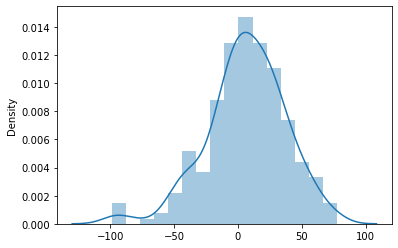

In [39]:
sns.distplot(y_test-y_predicted)

In [40]:
joblib.dump(GBR, 'GBR_regressor002.joblib')

['GBR_regressor002.joblib']

In [41]:
joblib.dump(player1_encoder, 'player1_encoderr002.joblib')

['player1_encoderr002.joblib']

In [42]:
joblib.dump(player2_encoder, 'player2_encoder002.joblib')

['player2_encoder002.joblib']

In [43]:
joblib.dump(venue_encoder, 'venue_encoder002.joblib')

['venue_encoder002.joblib']

In [44]:
joblib.dump(team_encoder, 'team_encoder002.joblib')#PICKLE MODEL CAN BE ALSO DONE

['team_encoder002.joblib']